In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import pickle

In [23]:
with open('test_cond_interactions.pkl', 'rb') as handle:
    data = pickle.load(handle)

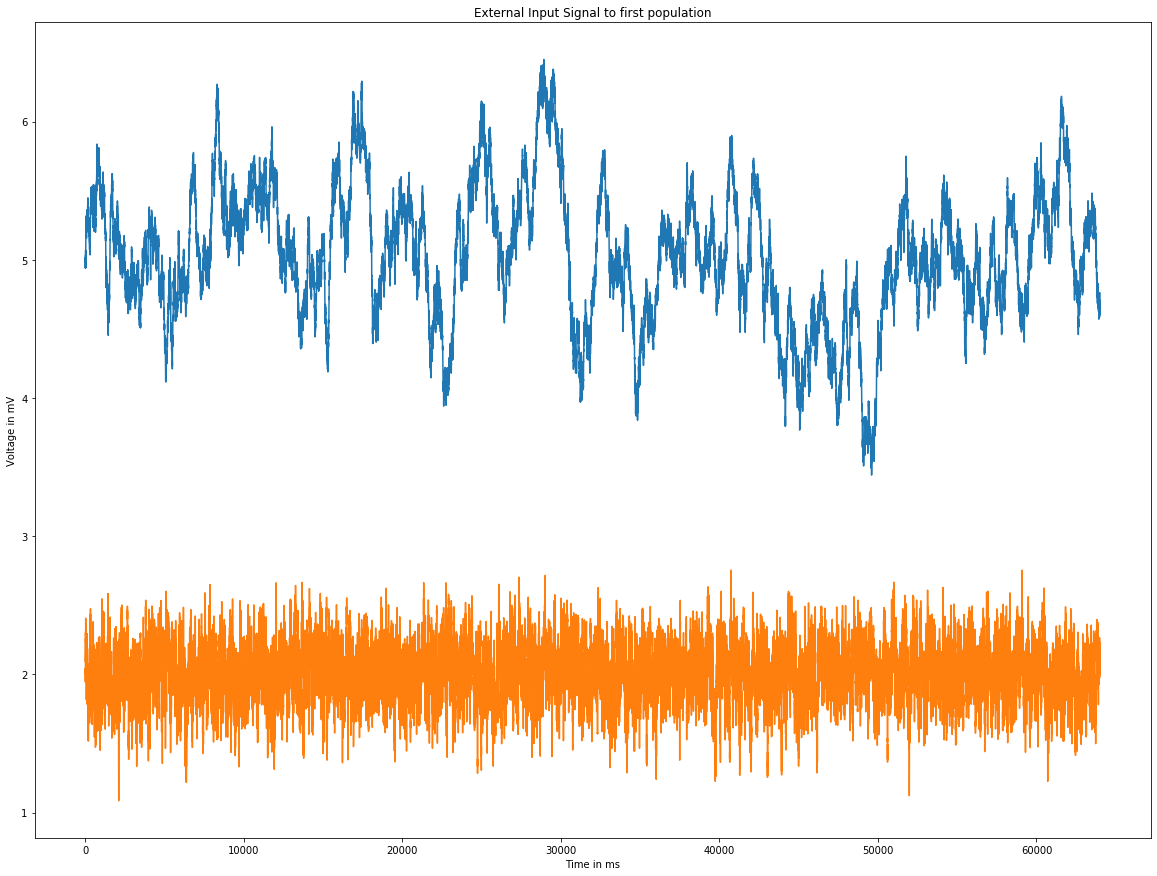

In [40]:
# External Signal to first population
ext_signal_1_mean = data['input_mean1']
ext_signal_1_sigma = data['input_sigma1']

fig = plt.figure(figsize=[20, 15])
ax = fig.add_subplot(111)
ax.set_title("External Input Signal to first population")
ax.set_xlabel("Time in ms")
ax.set_ylabel("Voltage in mV")
ax.plot(ext_signal_1_mean)
ax.plot(ext_signal_1_sigma)

In [35]:
skip = 200
duration = 300 # actual duration is 3200ms but we throw away the first 200ms
dt = 1.0

In [36]:
# rates
v_e1 = data['model_results']['net']['v_all_neurons_e']
v_e2 = data['model_results']['net']['v_all_neurons_e2']
v_i1 = data['model_results']['net']['v_all_neurons_i1']
v_i2 = data['model_results']['net']['v_all_neurons_i2']


v_e1 = v_e1[:,skip:duration + skip]
v_e2 = v_e2[:,skip:duration + skip]
v_i1 = v_i1[:,skip:duration + skip]
v_i2 = v_i2[:,skip:duration + skip]

# signal
ext_signal_1_mean = ext_signal_1_mean[skip:duration + skip]

# sum up voltages of excitatory Neuron Groups
lfp1 = np.sum(v_e1,axis=0)/1000
lfp2 = np.sum(v_e2,axis=0)/1000

# sum up voltages of inhibitory Neuron Groups
inh1 = np.sum(v_i1,axis=0)/1000
inh2 = np.sum(v_i2,axis=0)/1000

# time
t = np.linspace(0,duration,int(duration/dt))

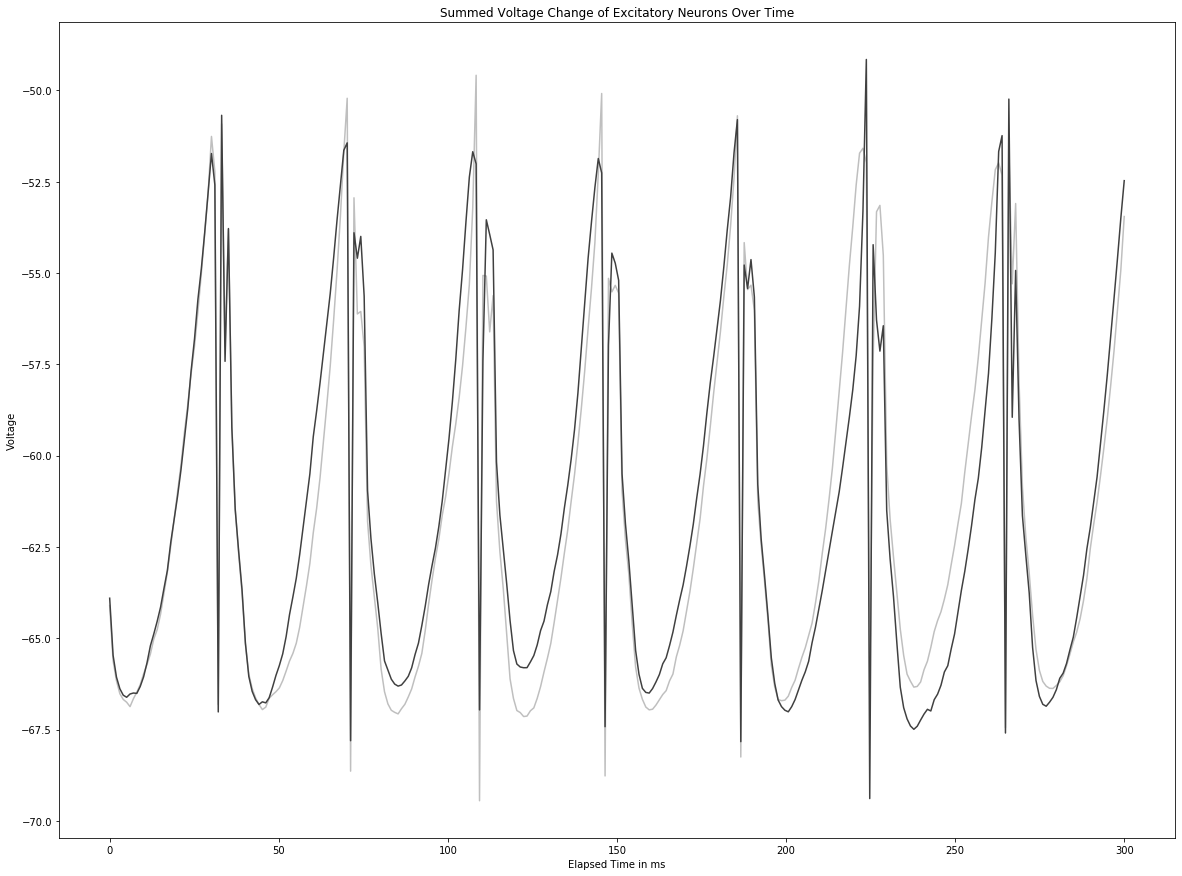

In [37]:
fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.set_title('Summed Voltage Change of Excitatory Neurons Over Time')
ax.set_xlabel("Elapsed Time in ms")
ax.set_ylabel("Voltage")
ax.plot(t,lfp1,'0.75')
ax.plot(t,lfp2,'0.25')

(0, 80)

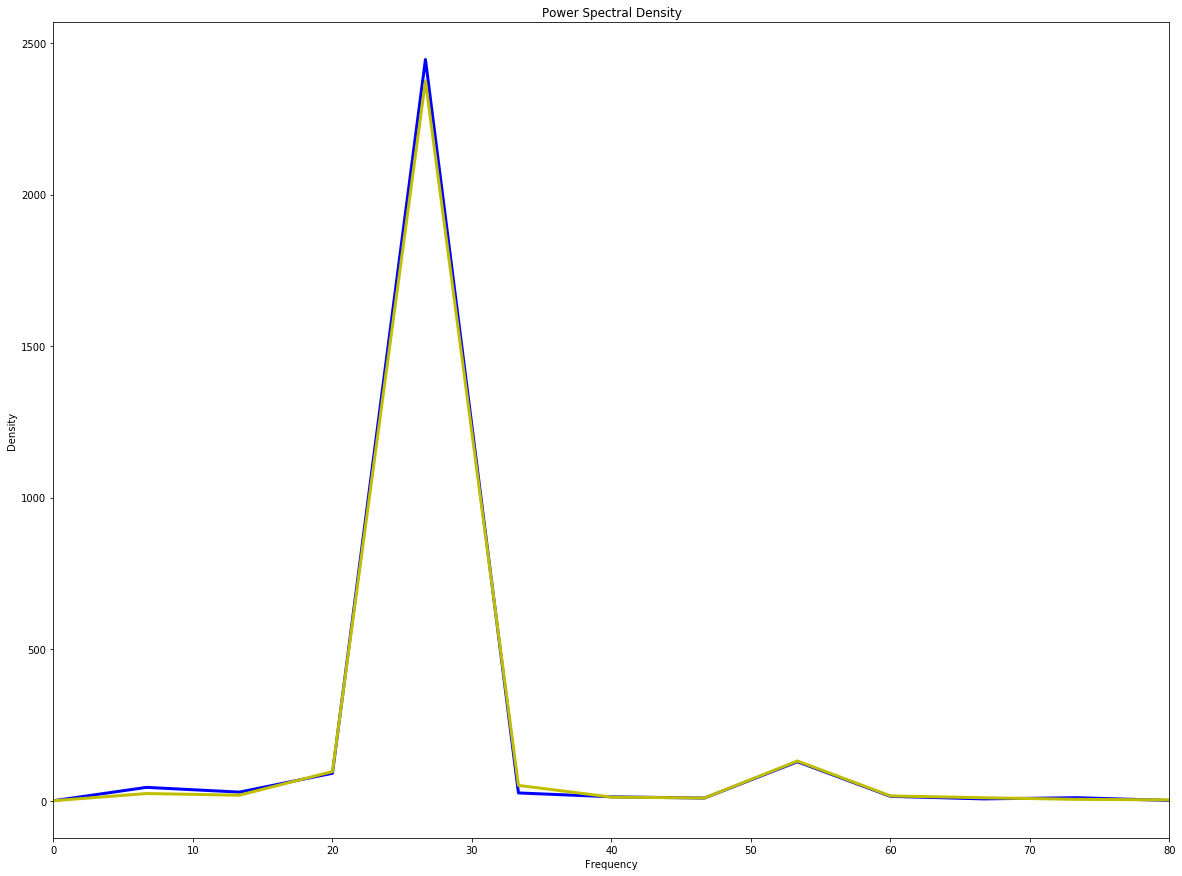

In [38]:
timepoints = int((duration/dt)/2)
fs = 1./dt
psd1,freqs = mlab.psd(lfp1,NFFT=int(timepoints),Fs=fs,noverlap=0,window=mlab.window_none)
psd2,_ = mlab.psd(lfp2,NFFT=int(timepoints),Fs=fs,noverlap=0,window=mlab.window_none)

psd1[0] = 0.0
psd2[0] = 0.0

fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.set_title("Power Spectral Density")
ax.set_xlabel("Frequency")
ax.set_ylabel("Density")
ax.plot(freqs*1000,psd1,'0.25',linewidth=3.0, c='b')
ax.plot(freqs*1000,psd2,'0.75',linewidth=3.0, c='y')
ax.set_xlim([0,80])

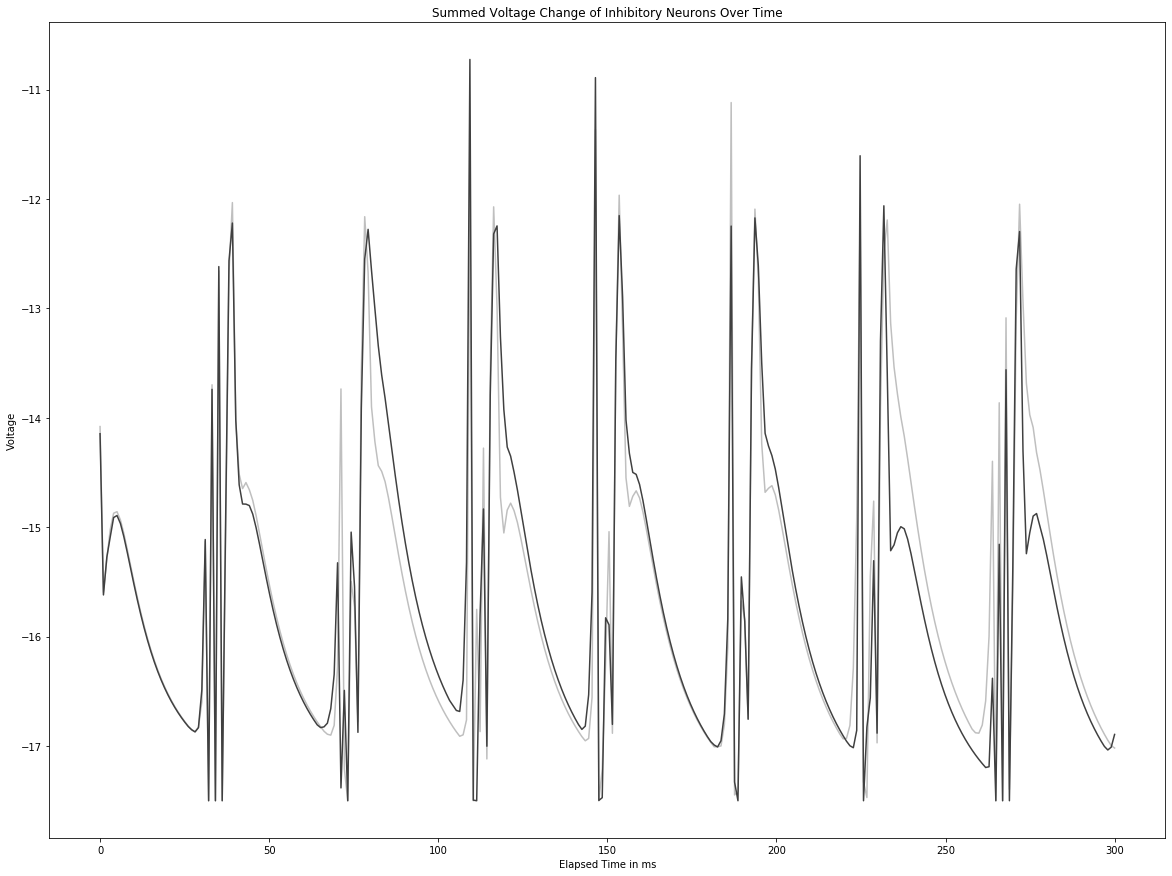

In [68]:
fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.set_title('Summed Voltage Change of Inhibitory Neurons Over Time')
ax.set_xlabel("Elapsed Time in ms")
ax.set_ylabel("Voltage")
ax.plot(t,inh1,'0.75')
ax.plot(t,inh2,'0.25')

(0, 80)

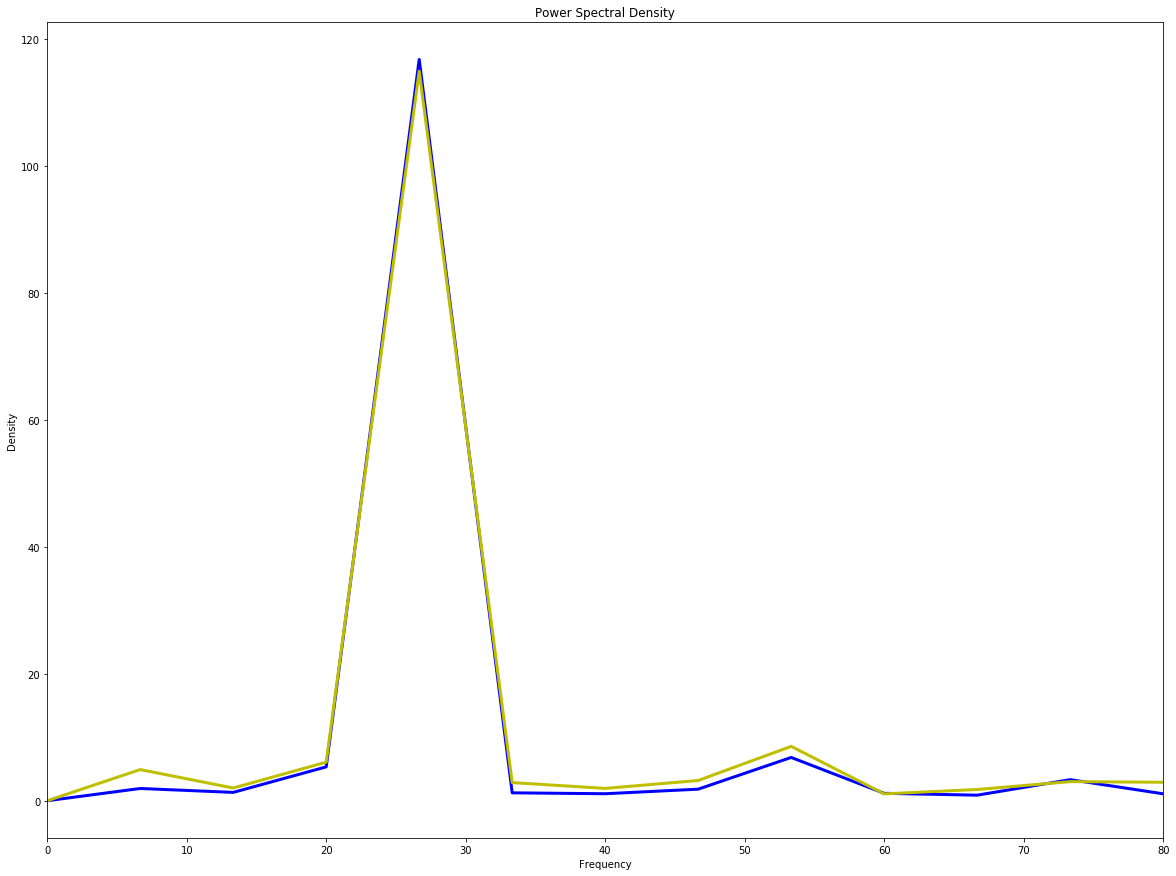

In [69]:
psdi1,freqs = mlab.psd(inh1,NFFT=int(timepoints),Fs=fs,noverlap=0,window=mlab.window_none)
psdi2,_ = mlab.psd(inh2,NFFT=int(timepoints),Fs=fs,noverlap=0,window=mlab.window_none)

psdi1[0] = 0.0
psdi2[0] = 0.0

fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.set_title("Power Spectral Density")
ax.set_xlabel("Frequency")
ax.set_ylabel("Density")
ax.plot(freqs*1000,psdi1,'0.25',linewidth=3.0, c='b')
ax.plot(freqs*1000,psdi2,'0.75',linewidth=3.0, c='y')
ax.set_xlim([0,80])

In [70]:
# spikes
s_e1 = data['model_results']['net']['net_spikes_e']
s_e2 = data['model_results']['net']['net_spikes_e2']
s_i1 = data['model_results']['net']['net_spikes_i1']
s_i2 = data['model_results']['net']['net_spikes_i2']


(1000, 2000)

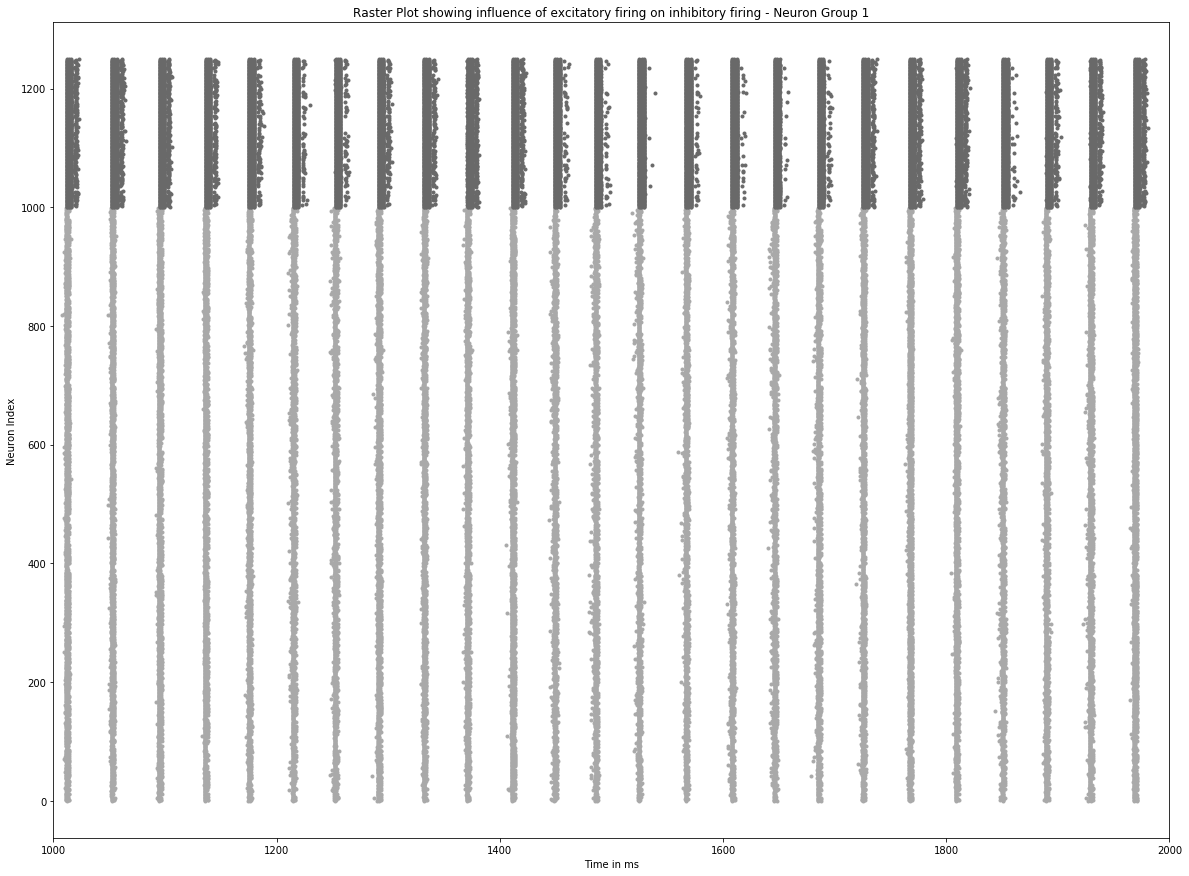

In [77]:
# Raster Plot
fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.set_title("Raster Plot showing influence of excitatory firing on inhibitory firing - Neuron Group 1")
ax.set_xlabel("Time in ms")
ax.set_ylabel("Neuron Index")
ax.plot(s_e1[1]*1000, s_e1[0], 'k.', c='darkgray')
ax.plot(s_i1[1]*1000, s_i1[0]+1000,'k.', c='dimgray')
ax.set_xlim([1000,2000])

(1000, 2000)

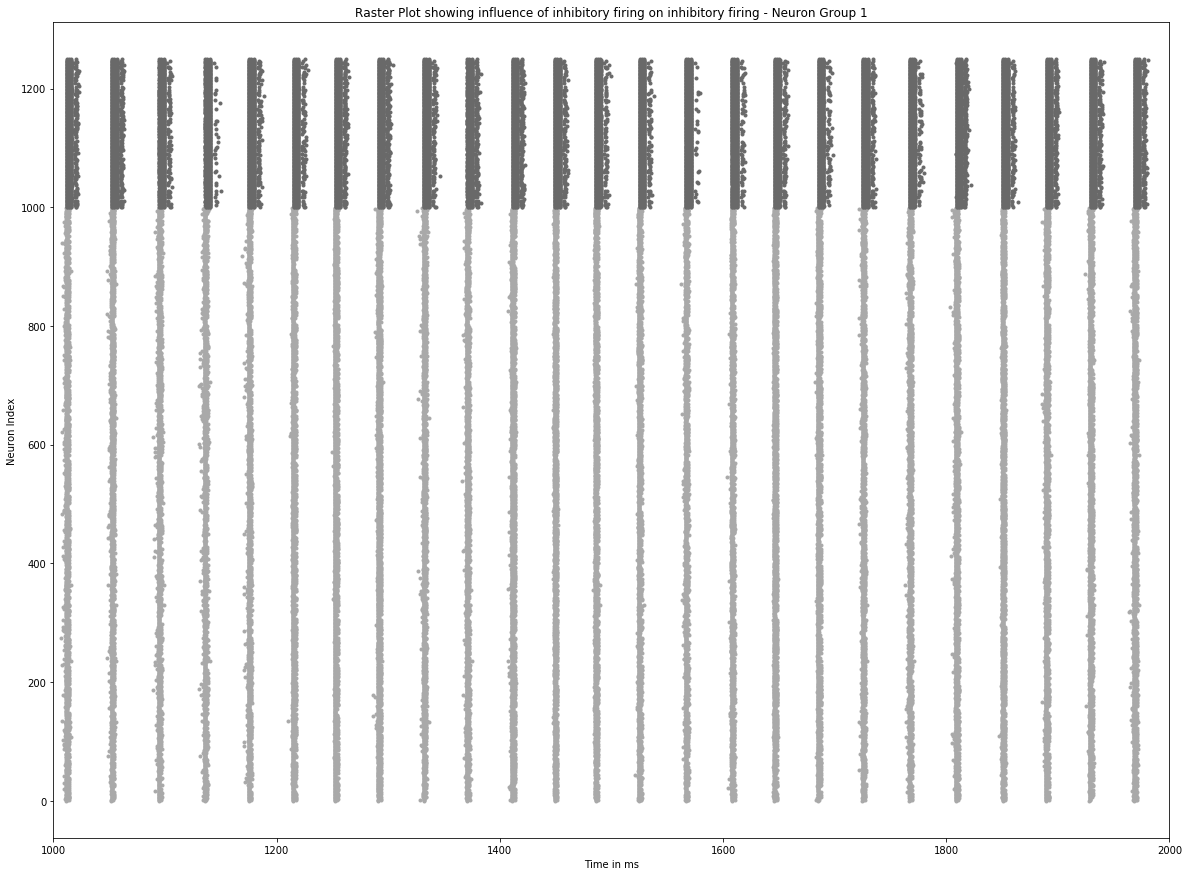

In [79]:
fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.set_title("Raster Plot showing influence of excitatory firing on inhibitory firing - Neuron Group 2")
ax.set_xlabel("Time in ms")
ax.set_ylabel("Neuron Index")
ax.plot(s_e2[1]*1000,s_e2[0],'k.', c='darkgray')
ax.plot(s_i2[1]*1000,s_i2[0]+1000,'k.', c='dimgray')
ax.set_xlim([1000,2000])

(1000, 1080)

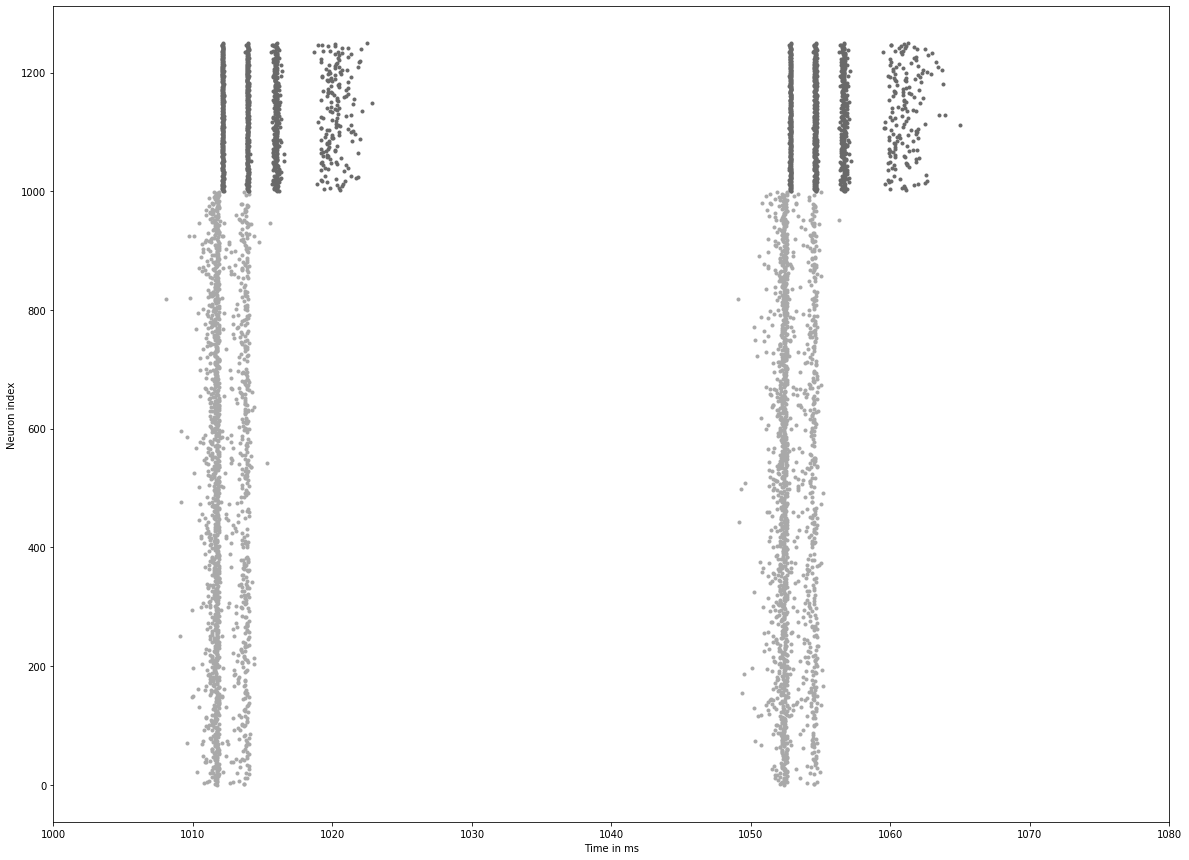

(1000, 1080)

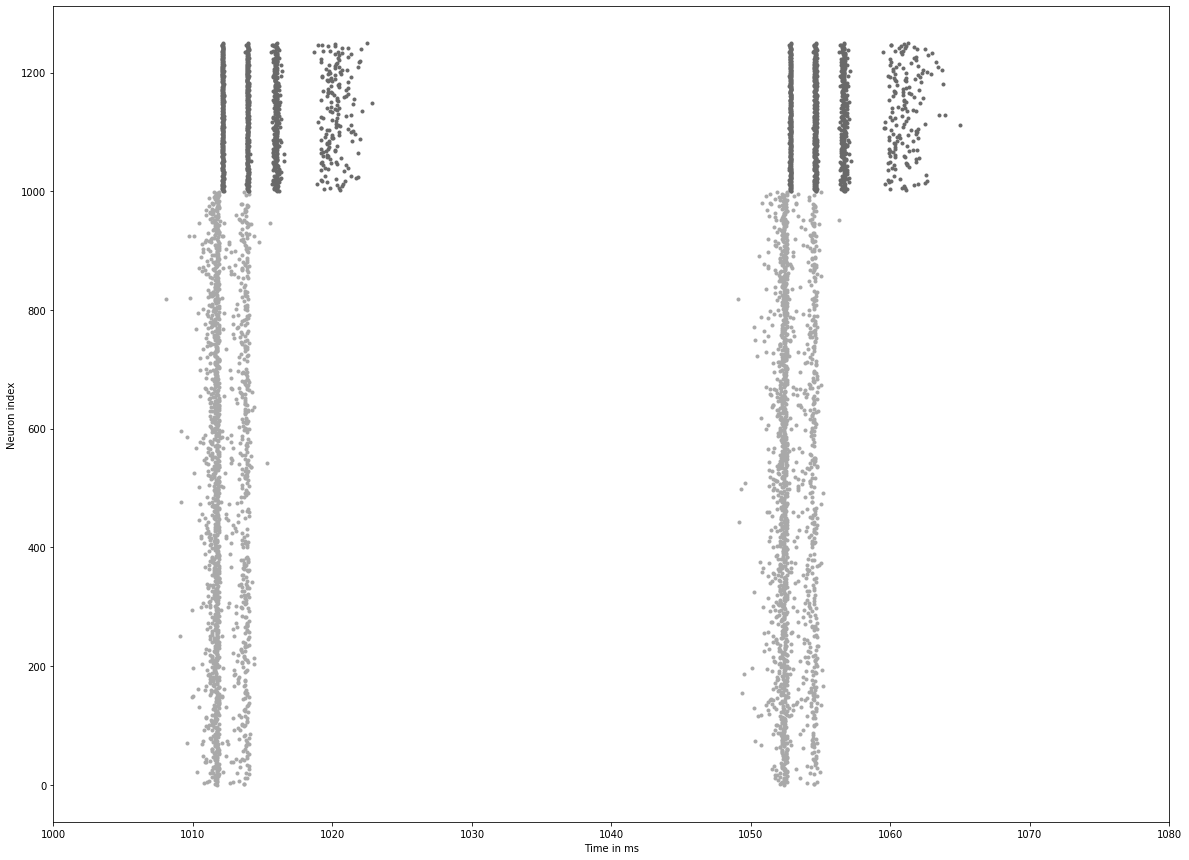

In [82]:
fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.set_xlabel('Time in ms')
ax.set_ylabel('Neuron index')
ax.plot(s_e1[1]*1000,s_e1[0],'k.', c='darkgray')
ax.plot(s_i1[1]*1000,s_i1[0]+1000,'k.', c='dimgray')
ax.set_xlim([1000,1080])